In [24]:
import osmnx as ox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

## get graph of interest

In [98]:
#place_name = "Berlin, Germany"
place_name = "Moabit, Berlin, Germany"
address = "Helmholtzstraße 30, 10587 Berlin"

# Fetch OSM street network from the location
#place_graph = ox.graph_from_place(place_name, network_type='bike', simplify=True, buffer_dist=500)
place_graph = ox.graph_from_address(address, network_type='bike', simplify=True)

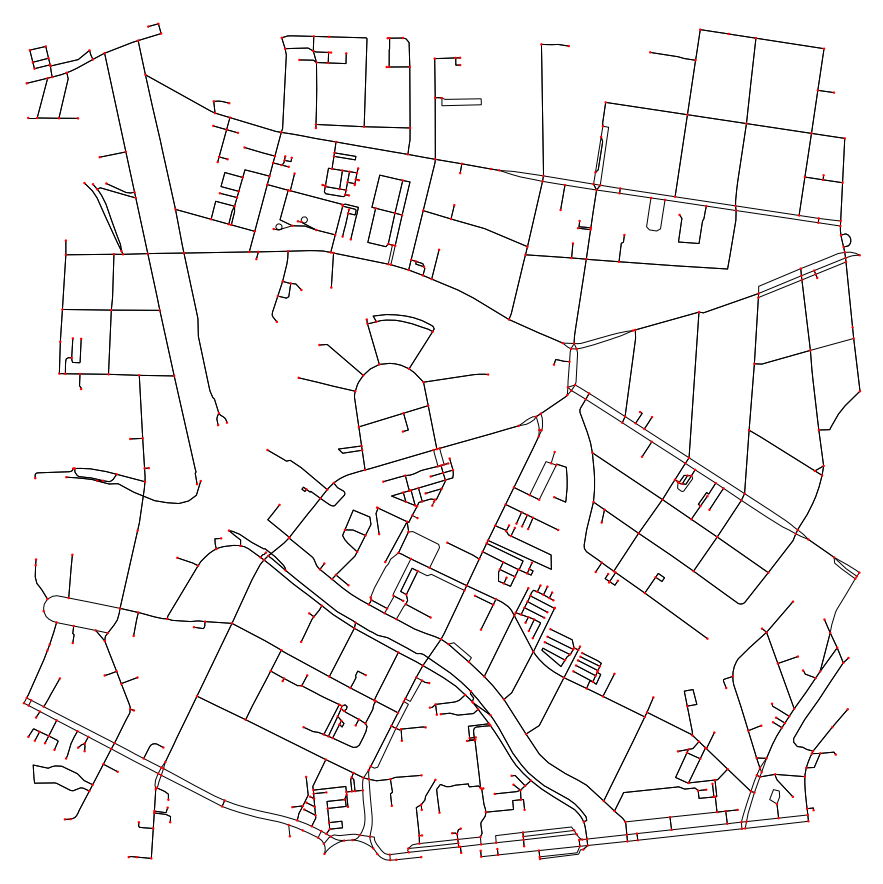

In [37]:
# Plot the streets
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=6, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color='red'
                        )

## remove unnamed ways

In [99]:
# remove ways without names
graph_nodes, graph_edges = ox.graph_to_gdfs(place_graph)

graph_edges = graph_edges.query('~name.isnull()')
graph_edges = graph_edges.query('highway!=service')

place_graph = ox.graph_from_gdfs(graph_nodes, graph_edges)
place_graph = ox.utils_graph.remove_isolated_nodes(place_graph)
place_graph = ox.utils_graph.get_largest_component(place_graph)

for _, _, d in place_graph.edges(data=True):
    d.pop('geometry', None)
    

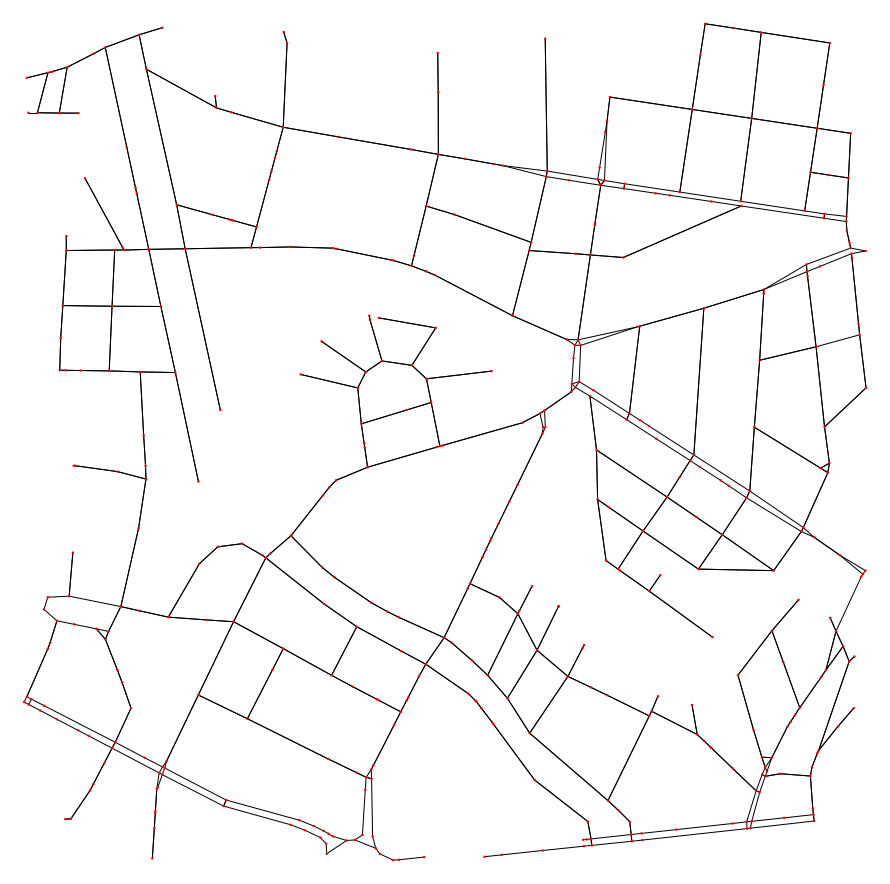

In [39]:
# Plot the streets
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=6, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color='red'
                        )

## stats

In [40]:
ec = ["r" if place_graph.in_degree(g) > place_graph.out_degree(g) else "blue" if 
      place_graph.in_degree(g) < place_graph.out_degree(g) else "grey" for g in 
 place_graph.nodes()]

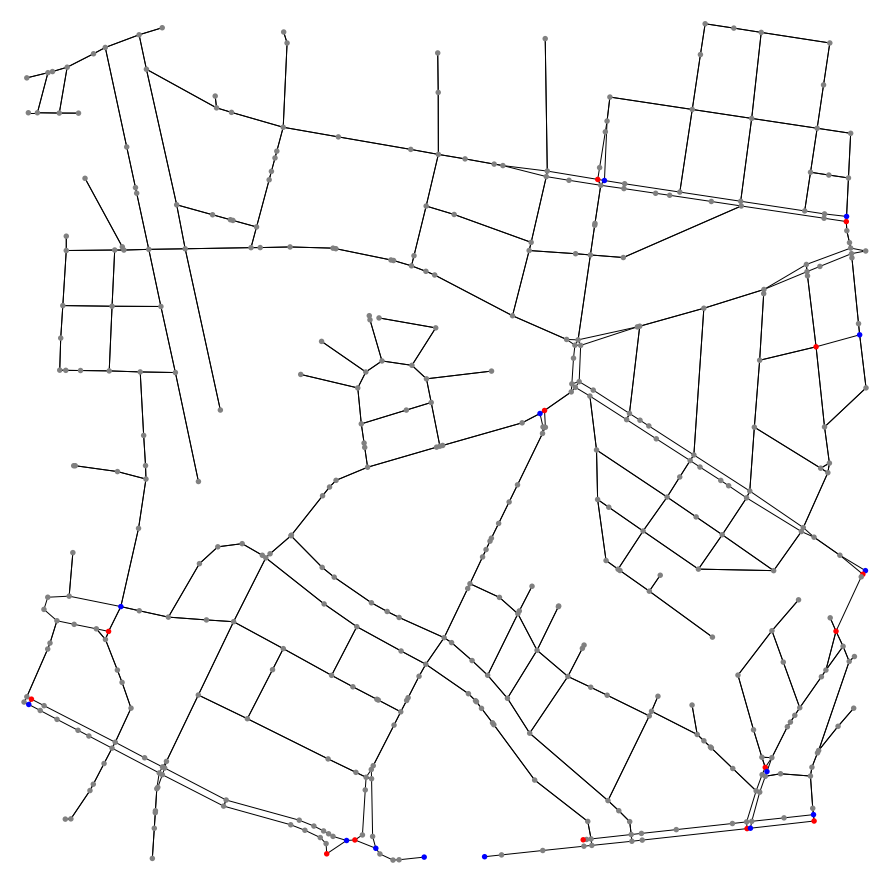

In [41]:
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=30, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color=ec
                        )

In [100]:
#place_graph = ox.projection.project_graph(place_graph)
place_graph = ox.simplification.consolidate_intersections(place_graph, tolerance=0.0002)

/home/timon/.local/lib/python3.8/site-packages/osmnx/simplification.py:450: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  chunks = get_chunks(gs_nodes.loc[idx].buffer(tolerance).values, n)
/home/timon/.local/lib/python3.8/site-packages/osmnx/simplification.py:502: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


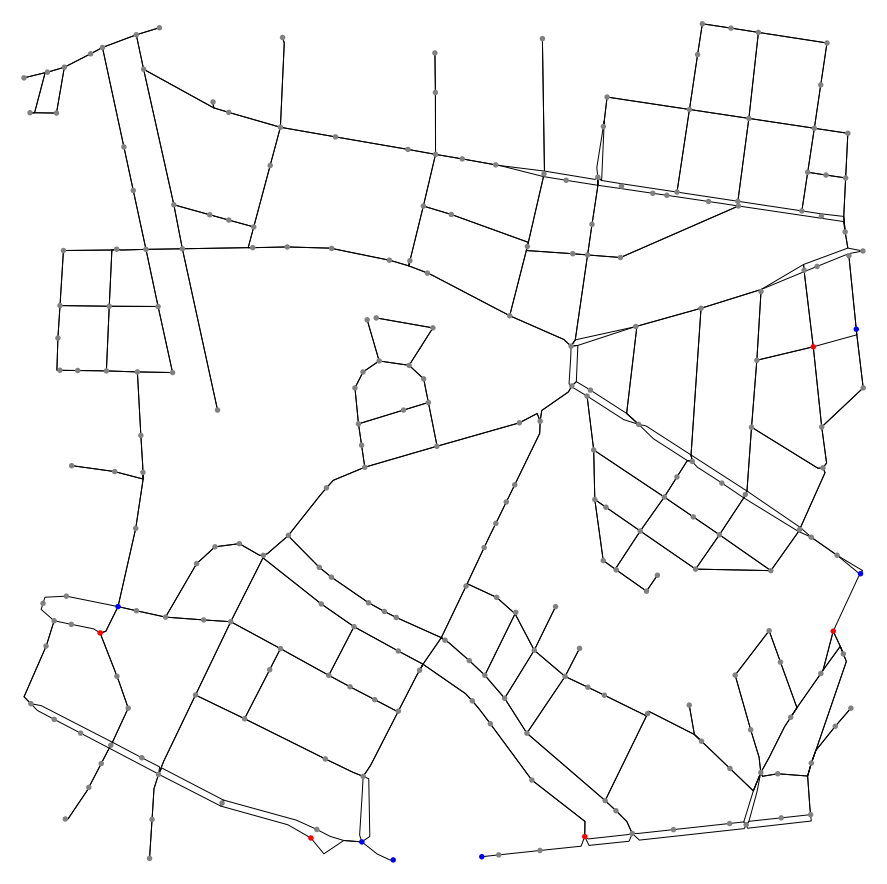

In [101]:
ec = ["r" if place_graph.in_degree(g) > place_graph.out_degree(g) else "blue" if 
      place_graph.in_degree(g) < place_graph.out_degree(g) else "grey" for g in 
 place_graph.nodes()]
fig, ax = ox.plot_graph(place_graph,edge_linewidth=1, node_size=30, figsize=(16,16),
                        bgcolor='#ffffff', edge_color='black', node_color=ec
                        )

In [44]:
stats = ox.stats.basic_stats(place_graph)
print("number of nodes: "+ str(stats['n']))
print("number of steets: "+ str(stats['m']))
print("total steetlength: "+ str(stats['edge_length_total'] / 1000) +"km")
print("durchschnittliche Straßenlänge: "+ str(stats['edge_length_avg']) +"m")

number of nodes: 430
number of steets: 912
total steetlength: 71.24882199999989km
durchschnittliche Straßenlänge: 78.12370833333321m


In [47]:
nodes, streets = ox.graph_to_gdfs(place_graph)
print("nodes")
print(nodes.head(3))
print("steets")
print(streets.head(3))

nodes
                   y          x  street_count                   geometry  \
osmid                                                                      
21487144   52.513200  13.321936             3  POINT (13.32194 52.51320)   
251106770  52.513189  13.321645             3  POINT (13.32165 52.51319)   
21487145   52.512902  13.322812             3  POINT (13.32281 52.51290)   

          highway  
osmid              
21487144      NaN  
251106770     NaN  
21487145      NaN  
steets
                                       osmid   lanes      ref  \
u         v         key                                         
21487144  251106770 0    [4403977, 25184999]  [4, 5]  B 2;B 5   
251106770 654381302 0                4403986       2      NaN   
          21487143  0              139880220       4  B 2;B 5   

                                       name    highway maxspeed    junction  \
u         v         key                                                       
21487144  251106770 0 